In [1]:
# Assignment on Visualization
import pandas as pd
import seaborn as sns
sns.set()
# Suppress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")


In [2]:
students_df = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/studentsperformance.csv")

In [3]:
students_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
students_df.shape

(1000, 8)

In [8]:
students_df['race/ethnicity'].nunique()

5

In [9]:
students_df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [12]:
null_rows = students_df[students_df.isnull().any(axis =1 )]
null_rows.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [18]:
students_df[['writing score','math score','reading score']].describe()

,writing score,math score,reading score
count,1000.000000,1000.00000,1000.000000
mean,68.054000,66.08900,69.169000
std,15.195657,15.16308,14.600192
min,10.000000,0.00000,17.000000
25%,57.750000,57.00000,59.000000
50%,69.000000,66.00000,70.000000
75%,79.000000,77.00000,79.000000
max,100.000000,100.00000,100.000000


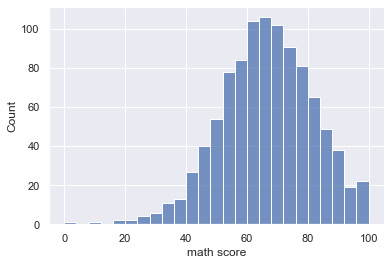

In [19]:
ax = sns.histplot(students_df['math score'])

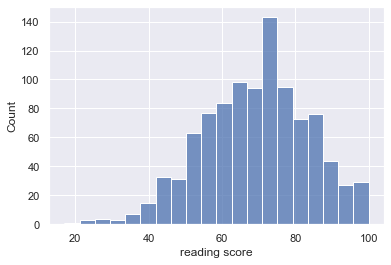

In [20]:
ax = sns.histplot(students_df['reading score'], bins = 20)

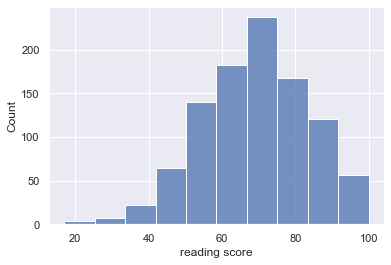

In [21]:
ax = sns.histplot(students_df['reading score'],bins = 10)

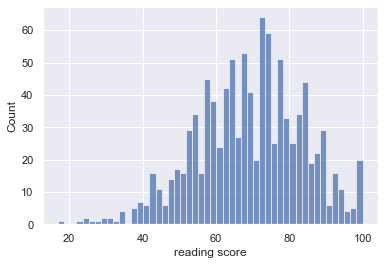

In [22]:
ax = sns.histplot(students_df['reading score'],bins =50)

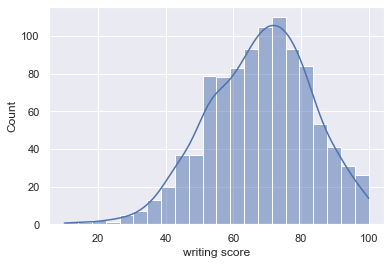

In [25]:
ax = sns.histplot(students_df['writing score'], kde = True)

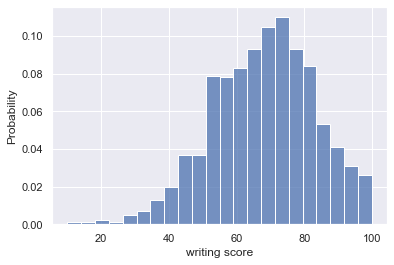

In [26]:
ax = sns.histplot(students_df['writing score'], stat = 'probability' )

<AxesSubplot:xlabel='math score', ylabel='reading score'>

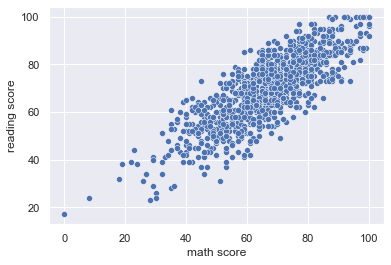

In [30]:
# scatterplot
sns.scatterplot(x = "math score", y = "reading score", data = students_df)

<AxesSubplot:xlabel='math score', ylabel='reading score'>

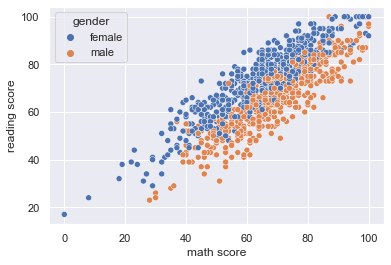

In [31]:
sns.scatterplot(x ="math score", y ="reading score", hue = "gender", data = students_df)

<AxesSubplot:xlabel='math score', ylabel='reading score'>

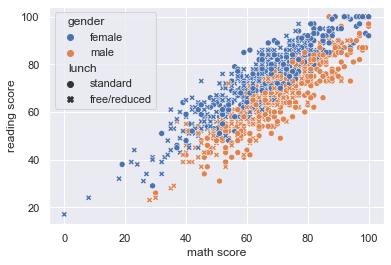

In [32]:
sns.scatterplot(x = "math score", y= "reading score",hue = "gender", style = "lunch", data = students_df)

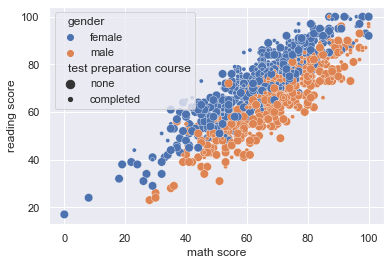

In [34]:
sns.scatterplot(x="math score", y="reading score", hue="gender", size="test preparation course",  data=students_df);

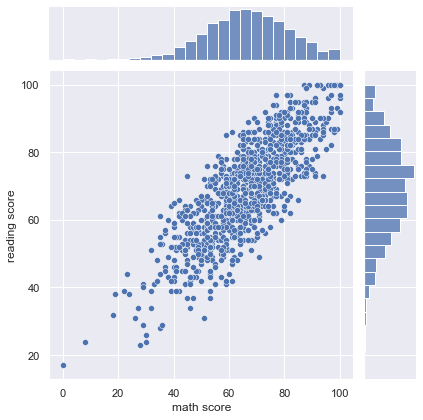

In [36]:
sns.jointplot(x="math score", y="reading score", data=students_df);

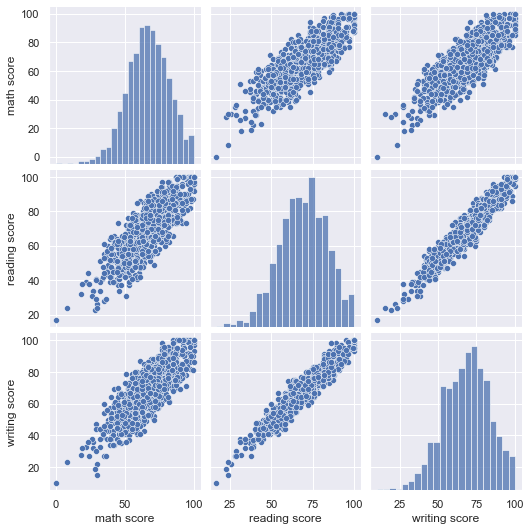

In [37]:
sns.pairplot(students_df)

<AxesSubplot:ylabel='math score'>

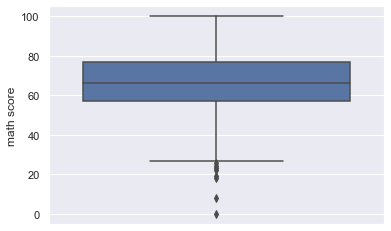

In [38]:
sns.boxplot(y ="math score",data = students_df)

<AxesSubplot:xlabel='gender', ylabel='math score'>

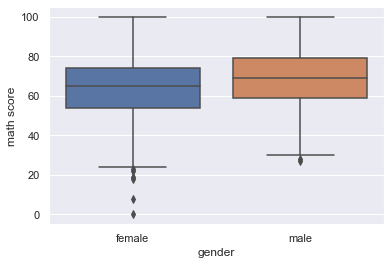

In [39]:
# How are math scores distributed across genders?
sns.boxplot(y = "math score", x = "gender", data = students_df)

[Text(0, 0, "bachelor's degree"),
 Text(1, 0, 'some college'),
 Text(2, 0, "master's degree"),
 Text(3, 0, "associate's degree"),
 Text(4, 0, 'high school'),
 Text(5, 0, 'some high school')]

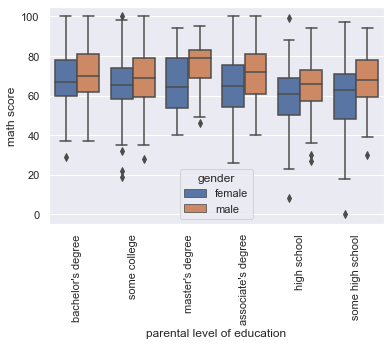

In [40]:
# How are math scores affected by parent education and gender?
ax = sns.boxplot(y = "math score", hue = "gender", x = "parental level of education", data = students_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)

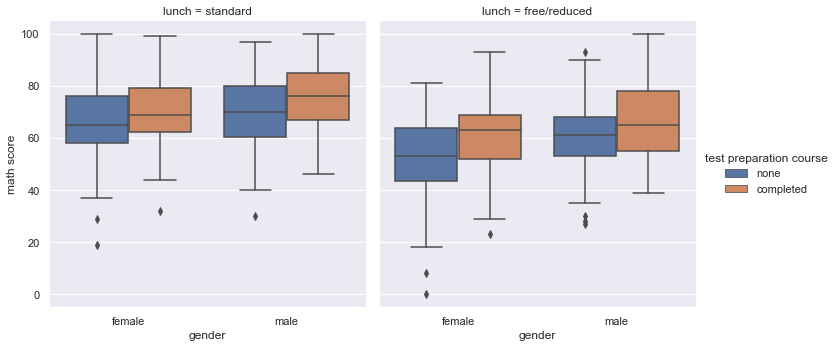

In [41]:
# If you want to see the gender, lunch, and test preparation course variables in one plot, then a categorical plot might be a good choice. For this, use the catplot() function.
sns.catplot(y = "math score",x = "gender", hue = "test preparation course", col ="lunch",kind = "box", data = students_df)

<AxesSubplot:xlabel='math score', ylabel='reading score'>

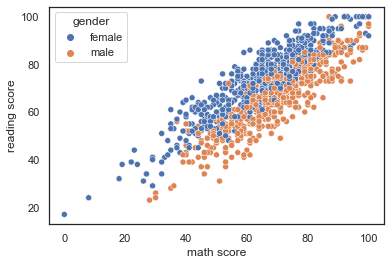

In [42]:
sns.set_style("white")
sns.scatterplot(x = "math score", y= "reading score", hue = "gender", data = students_df)

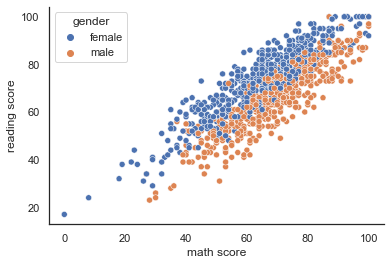

In [43]:
# Get rid of the box
sns.scatterplot( x = "math score", y= "reading score",hue = "gender", data = students_df)
sns.despine()

<AxesSubplot:xlabel='math score', ylabel='reading score'>

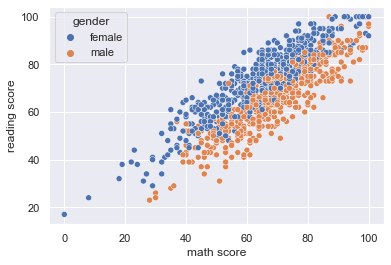

In [45]:
sns.set()
sns.scatterplot( x= "math score", y ="reading score", hue = "gender",data = students_df)

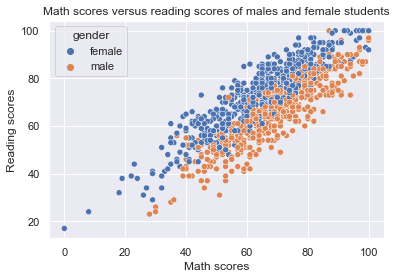

In [46]:
import matplotlib.pyplot as plt
# custom labels
sns.scatterplot(x = "math score", y = "reading score", hue = "gender", data = students_df)
plt.xlabel('Math scores')
plt.ylabel('Reading scores')
plt.title('Math scores versus reading scores of males and female students')
plt.show()

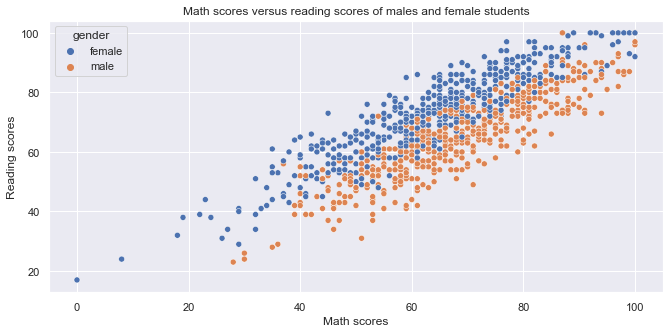

In [48]:
# Make a wider plot
plt.figure(figsize = (11,5))
sns.scatterplot(x="math score", y="reading score", hue="gender", data=students_df)
plt.xlabel('Math scores')
plt.ylabel('Reading scores')
plt.title('Math scores versus reading scores of males and female students')
plt.show()

In [62]:
# Assignment : House Prices
# To keep the page organized, do all imports here
from sqlalchemy import create_engine, text
import pandas as pd

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set()

# Suppress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")

# Database credentials
postgres_user = 'dabc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

# Use the credentials to start a connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
prices_df = pd.read_sql_query(text('SELECT * FROM houseprices'), con=engine.connect())

# Remove the connection
engine.dispose()

# Add your code here
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

<AxesSubplot:xlabel='saleprice', ylabel='Density'>

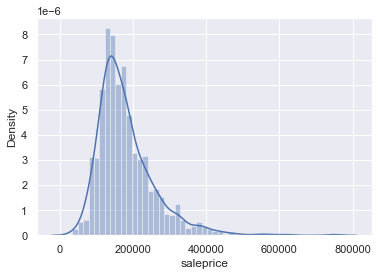

In [52]:
sns.distplot(prices_df['saleprice'])

<AxesSubplot:xlabel='lotarea'>

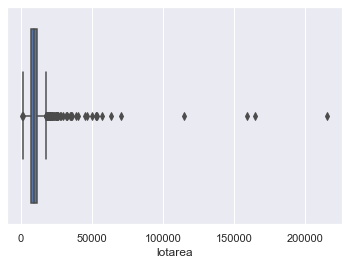

In [53]:
sns.boxplot(prices_df['lotarea'])

<AxesSubplot:xlabel='lotarea'>

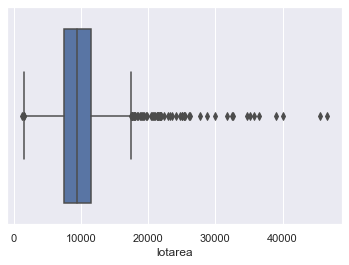

In [89]:
series = prices_df[prices_df['lotarea']<= 50000]
aa = series['lotarea']
sns.boxplot(aa)


In [90]:
prices_df

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,...,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2010,WD,Normal,142125


<AxesSubplot:xlabel='overallcond', ylabel='saleprice'>

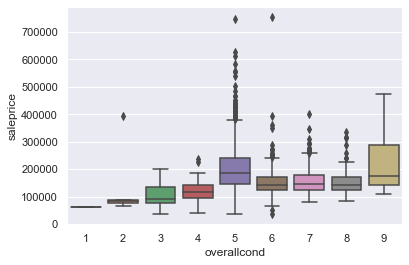

In [98]:
sns.boxplot( x = "overallcond",y = "saleprice", data = prices_df)

In [106]:
sns.boxplot( x = "overallcond",y = "saleprice", hue = "centralair"data = prices_df)

SyntaxError: invalid syntax (2197722257.py, line 1)

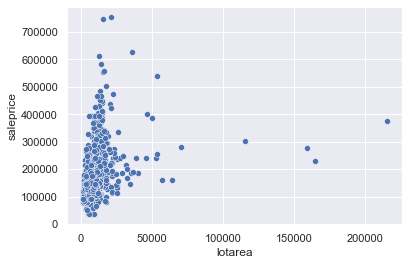

In [104]:
sns.scatterplot(x="lotarea", y="saleprice",data=prices_df);